In [18]:
# 载入数据
from sklearn.datasets import load_breast_cancer

cancer = load_breast_cancer()  #乳腺癌数据集
X = cancer.data      
y = cancer.target    #1或0  阳性或阴性
print('data type: {0}; no.positive: {1}; no.negative: {2}'.format(X.shape, y[y==1].shape, y[y==0].shape))   #569个样本，30个特征  阳性：357  阴性：212
print(cancer.data[0])
print(cancer.feature_names) # 查看特征名称


data type: (569, 30); no.positive: (357,); no.negative: (212,)
[1.799e+01 1.038e+01 1.228e+02 1.001e+03 1.184e-01 2.776e-01 3.001e-01
 1.471e-01 2.419e-01 7.871e-02 1.095e+00 9.053e-01 8.589e+00 1.534e+02
 6.399e-03 4.904e-02 5.373e-02 1.587e-02 3.003e-02 6.193e-03 2.538e+01
 1.733e+01 1.846e+02 2.019e+03 1.622e-01 6.656e-01 7.119e-01 2.654e-01
 4.601e-01 1.189e-01]
['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']


In [19]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

# 把数据集分为训练集和测试集
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)


# 使用LogisticRegression模型来训练，并计算训练集的评分数据和测试集的评分数据。
# 模型训练
model = LogisticRegression()
model.fit(X_train, y_train)

train_score = model.score(X_train, y_train)
test_score = model.score(X_test, y_test)
print('train score: {train_score: .6f}; test score: {test_score: .6f}'.format(train_score=train_score, test_score=test_score))



(455, 30) (455,)
(114, 30) (114,)
train score:  0.940659; test score:  0.991228


C:\Users\DL\AppData\Roaming\Python\Python38\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [20]:
# 样本预测
import numpy as np #导入numpy，因为下面要用到它（np。equal()函数）
y_pred = model.predict(X_test)
print('matches: {0}/{1}'.format(np.equal(y_pred, y_test).shape[0], y_test.shape[0]))


matches: 114/114


In [21]:
# 预测概率：找出预测概率低于90%的样本
y_pred_proba = model.predict_proba(X_test) # 计算每个测试样本的预测概率
# 打印第一个样本的数据，以便我们了解数据形式
print('sample of predict probability: {0}'.format(y_pred_proba[0]))

"""输出：
sample of predict probability: [0.00588337 0.99411663]
"""

# 找出第一列，即预测为阴性的概率大于0.1的样本，保存在result里
y_pred_proba_0 = y_pred_proba[:, 0] > 0.1
result = y_pred_proba[y_pred_proba_0]

# 在result结果集里，找到第二列，即预测为阳性的概率大于0.1的样本
y_pred_proba_1 = result[:, 1] > 0.1
print(result[y_pred_proba_1])



sample of predict probability: [1.00000000e+00 1.82480572e-16]
[[0.64767315 0.35232685]
 [0.59767017 0.40232983]
 [0.13969712 0.86030288]
 [0.27590425 0.72409575]
 [0.1245546  0.8754454 ]
 [0.17126463 0.82873537]
 [0.52068868 0.47931132]
 [0.15740193 0.84259807]
 [0.44747359 0.55252641]
 [0.11668397 0.88331603]
 [0.12380744 0.87619256]
 [0.88265791 0.11734209]
 [0.11263639 0.88736361]
 [0.49347121 0.50652879]
 [0.83003397 0.16996603]
 [0.12267101 0.87732899]
 [0.31616788 0.68383212]
 [0.12371724 0.87628276]]


In [1]:

from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline

# 增加多项式预处理
def polynomial_model(degree=1, **kwarg):
    polynomial_features = PolynomialFeatures(degree=degree, include_bias=False)
    logistic_regression = LogisticRegression(**kwarg)
    pipeline = Pipeline([("polynomial_features", polynomial_features), ("logistic_regression", logistic_regression)])
    return pipeline

# 接着，增加二项多项式特征，创建并训练模型
import time
model = polynomial_model(degree=2, penalty='l1') #我们使用L1范数作为正则项（参数penalty='l1'）

start = time.clock()
model.fit(X_train, y_train)

train_score = model.score(X_train, y_train)
cv_score = model.score(X_test, y_test)
print('elaspe: {0:.6f}; train_score: {1: 0.6f}; cv_score: {2: .6f}'.format(time.clock()-start, train_score, cv_score))



AttributeError: module 'time' has no attribute 'clock'

In [24]:
#_*_coding:utf-8_*_
from numpy import *
 
# 读取数据
def loadDataSet(filename):
    '''
        对于testSet.txt，每行前两个值分别是X1和X2，第三个值数据对应的类别标签
        而且为了设置方便，该函数还将X0的值设置为1.0
        :return:
        '''
    dataMat = []
    labelMat = []
    fr = open(filename)
    for line in fr.readlines():
        lineArr = line.strip().split()
        dataMat.append([1.0, float(lineArr[0]), float(lineArr[1])])
        labelMat.append(int(lineArr[2]))
    return dataMat,labelMat
 
def sigmoid(inX):
    return 1.0/(1+exp(-inX))
 
def gradAscent(dataMatIn,classLabels):
    '''
        :param dataMatIn: 是一个2维Numpy数组，每列分别代表每个不同的特征
        每行则代表每个训练样本。
        :param classLabels: 是类别标签，是一个1*100的行向量，为了便于矩阵运算，需要将行向量
        转换为列向量，就是矩阵的转置，再将其赋值与labelMat。
        :return:
        '''
    dataMatrix = mat(dataMatIn)
    labelMat = mat(classLabels).transpose()
    # labelMat = mat(classLabels).T
    m,n = shape(dataMatrix)
    # alpha是向目标移动的步长
    alpha = 0.001
    # 迭代次数
    maxCycles = 500
    weights = ones((n,1))
    for k in range(maxCycles):
        h = sigmoid(dataMatrix*weights)
        error = (labelMat-h)
        weights = weights + alpha*dataMatrix.transpose()*error
    return weights

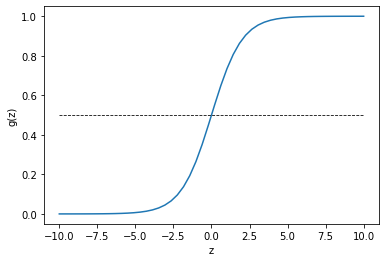

In [6]:
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
 
X = np.linspace(-10,10)
y = []
for i in X:
    y.append(1/(1+np.exp(-i)))
plt.plot(X,y)
plt.plot(X,np.ones(len(X))/2,'--',c='black',linewidth='0.8')
plt.xlabel('z')
plt.ylabel('g(z)')
plt.show()

训练精度（C=0.001)：0.9530516431924883
测试精度（C=0.001)：0.9440559440559441
训练精度（C=1)：0.9460093896713615
测试精度（C=1)：0.965034965034965
训练精度（C=100)：0.9436619718309859
测试精度（C=100)：0.958041958041958


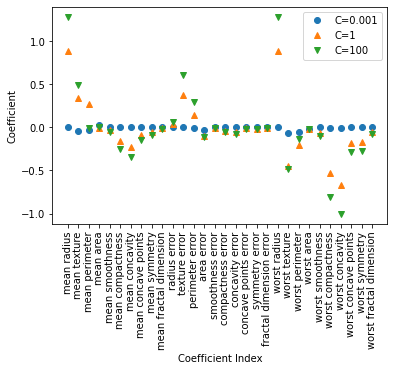

In [7]:
# 乳腺癌数据上使用Logistic Regression
from sklearn.datasets import load_breast_cancer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
 
cancer = load_breast_cancer()
X_train,X_test,y_train,y_test = train_test_split(cancer.data,cancer.target,stratify = cancer.target,random_state=42)
 
for C,maker in zip([0.001,1,100],['o','^','v']):
    logistic = LogisticRegression(C = C,penalty='l2',max_iter=100).fit(X_train,y_train)
    print('训练精度（C={})：{}'.format(C,logistic.score(X_train,y_train)))
    print('测试精度（C={})：{}'.format(C,logistic.score(X_test,y_test)))
    plt.plot(logistic.coef_.T,maker,label = 'C={}'.format(C))
plt.xticks(range(cancer.data.shape[1]),cancer.feature_names,rotation = 90)
plt.xlabel('Coefficient Index')
plt.ylabel('Coefficient')
plt.legend()
plt.show()